In [ ]:
from tensorflow.python.keras.datasets import imdb
import numpy as np


C:\Users\RISHI\.julia\conda\3\lib\site-packages\h5py\__init__.py:40: UserWarning: h5py is running against HDF5 1.10.5 when it was built against 1.10.4, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [52]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words= 10000)

In [53]:
classNames = ['Negative', 'Positive']
word_index = imdb.get_word_index()


In [54]:
print(word_index['hello'])

4822


# Decoding the reviews

In [55]:
rev_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += rev_word_index[i]
        text += ' '
    return text    

In [64]:
decode(x_train[0]);

In [65]:
def show_length():
    print("The length of 1st train example is:  ", len(x_train[0]))
    print("The length of 2nd train example is:  ", len(x_train[1]))
    print("The length of 1st test example is:  ", len(x_test[0]))
    print("The length of 2nd test example is:  ", len(x_test[1]))
    
show_length();    

The length of 1st train example is:   256
The length of 2nd train example is:   256
The length of 1st test example is:   256
The length of 2nd test example is:   256


# Padding the examples
To make the examples of equal length, meaningless words such as articles are added to the trainning set

In [58]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, value = word_index['the'], padding ='post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding ='post', maxlen = 256)

In [59]:
show_length()

The length of 1st train example is:   256
The length of 2nd train example is:   256
The length of 1st test example is:   256
The length of 2nd test example is:   256


In [77]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,GlobalAveragePooling1D,Embedding

model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
     
    ])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
    
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [79]:
from tensorflow.python.keras.callbacks import LambdaCallback

simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))

E = 20

h = model.fit(
    
    x_train,y_train,
    validation_split = 0.2,
    epochs = 20,
    callbacks = [simple_log],
    verbose = False

)


0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

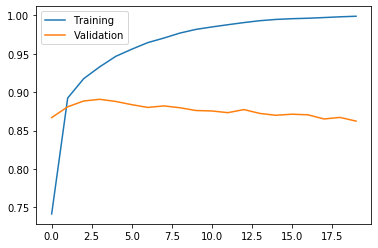

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E), h.history['acc'], label = 'Training')
plt.plot(range(E), h.history['val_acc'], label = 'Validation')
plt.legend()
plt.show()

In [85]:
loss, acc = model.evaluate(x_test,y_test)
print("Test accuracy",acc*100,'%')

25000/25000 [==============================] - 1s 45us/sample - loss: 0.9639 - acc: 0.8413
Test accuracy 84.12799835205078 %


In [110]:
prediction = model.predict(np.expand_dims(x_test[39], axis = 0))
class_names = ['Negative', 'Positive']
print(class_names[np.argmax(prediction[0])])


Negative


In [111]:
print(decode(x_test[0]))

the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 

In [118]:
for i in range(5000):
    prediction = model.predict(np.expand_dims(x_test[i], axis = 0))
    class_names = ['Negative', 'Positive']
    res = class_names[np.argmax(prediction)]
    print(res)
    

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
N

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
N

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
N

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
N

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
N

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
N